In [ ]:
import zipfile

In [ ]:
zip_ref=zipfile.ZipFile("/home/eee/ug/15085004/all (1).zip",'r')

Zip file containing dataset.

In [ ]:
zip_ref.extractall("/home/eee/ug/15085004/instacart/")

Extracting Path.

In [ ]:
zip_ref.close()

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()
%matplotlib inline


Importing required libraries. Numpy for performing Maths, pandas for handeling data, Matplotlib and seaborn for plotting charts and graphs.

In [3]:
order_products_train_df=pd.read_csv("order_products__train.csv")

In [4]:
order_products_prior_df=pd.read_csv("order_products__prior.csv")
orders_df=pd.read_csv("orders.csv")
products_df=pd.read_csv("products.csv")
aisles_df=pd.read_csv("aisles.csv")
departments_df=pd.read_csv("departments.csv")

Reading CSV files from the folder using Pandas DataFrame.

In [5]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


Looking at the data and its features.

In [6]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


Looking at orders file and its different features.

In [7]:
cnt_srs=orders_df.eval_set.value_counts()

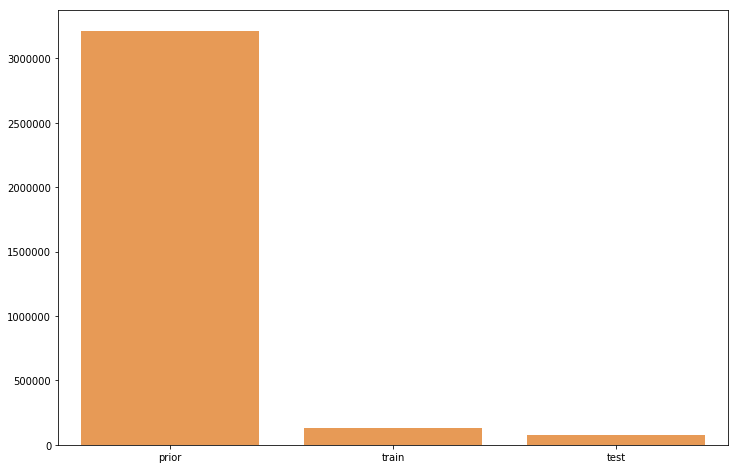

In [8]:
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8,color=color[1])
plt.savefig('fig1')

Total number of orders from every customer. 

In [9]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs=orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)


In [10]:
cnt_srs.head()

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

Total number of customers are 206209 and these are divided into training set of 131209 and test set of 75000 customers.

In [11]:
cnt_src=orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()


In [12]:
cnt_src.head()

,user_id,order_number
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5


In [13]:
cnt_src=cnt_src.order_number.value_counts()

In [14]:
cnt_src.head()

4    23986
5    19590
6    16165
7    13850
8    11700
Name: order_number, dtype: int64

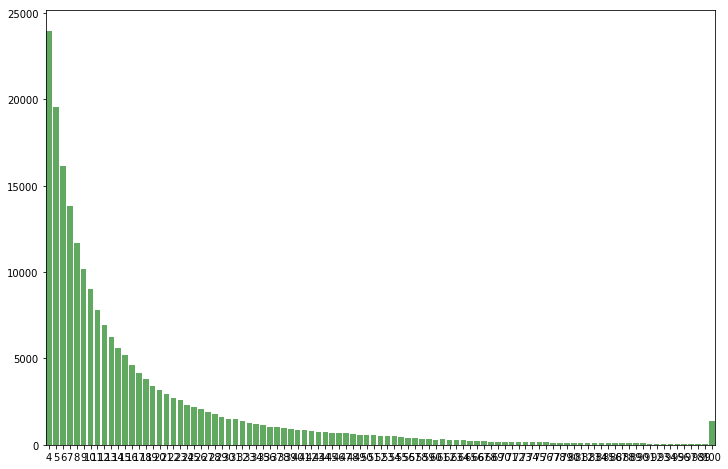

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(cnt_src.index,cnt_src.values,color=color[2],alpha=0.8)
plt.savefig('fig2')
plt.show()

Customers having different number of orders from 4 to 100 in the dataset. Maximum number of customers having 4 orders, it decreases with increasing number of orders.

In [16]:
cnt_dow=orders_df.order_dow.value_counts()

In [17]:
cnt_dow.head()

0    600905
1    587478
2    467260
5    453368
6    448761
Name: order_dow, dtype: int64

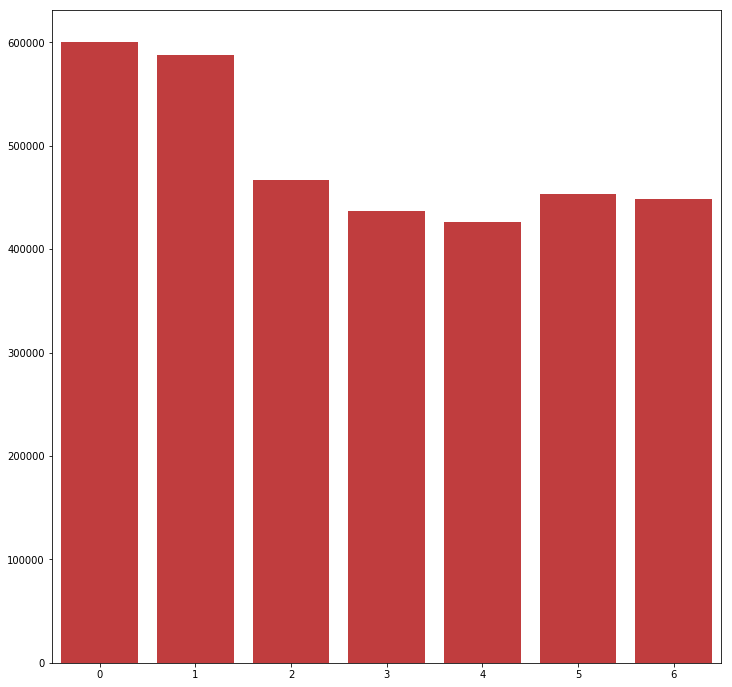

In [18]:
plt.figure(figsize=(12,12))
sns.barplot(cnt_dow.index,cnt_dow.values,color=color[3])
plt.savefig('fig3')
plt.show()

Number of orders during different days of the week. Here 0 and 1 are Saturday and Sunday. So, there are maximum nummber of orders during weekend and remains almost equal during weekdays.

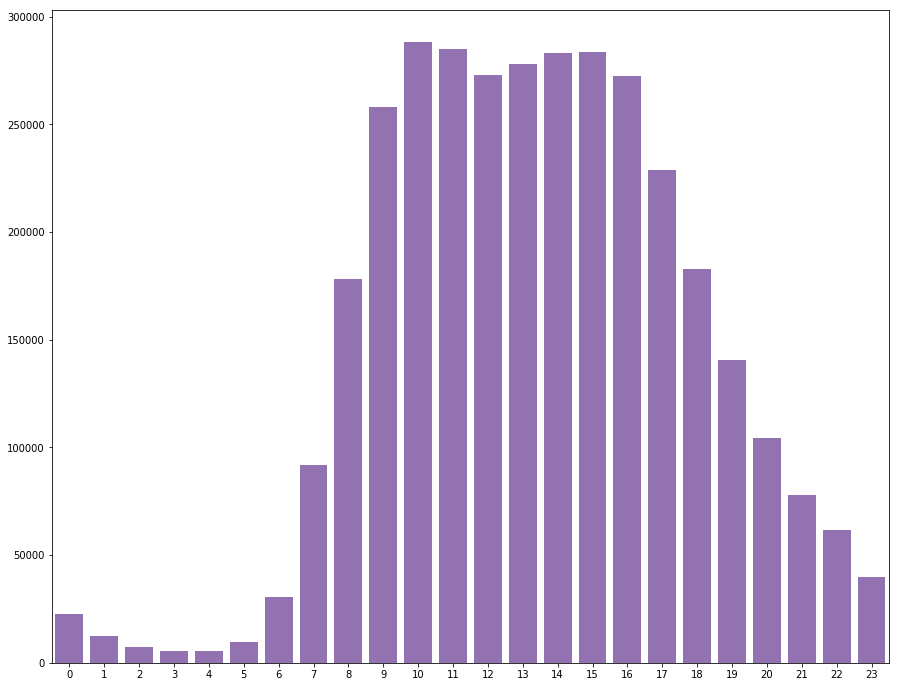

In [19]:
cnt_hod=orders_df.order_hour_of_day.value_counts()
plt.figure(figsize=(15,12))
sns.barplot(cnt_hod.index,cnt_hod.values,color=color[4])
plt.savefig('fig4')
plt.show()

Above bar plot gives the orders distribution during hours of the day. It shows that maximum number of orders are placed between 9  am to 5 pm.

In [47]:
grouped_df=orders_df.groupby(['order_dow','order_hour_of_day'])['order_number'].aggregate('count').reset_index()

In [48]:
#grouped_df.head()
grouped_df=grouped_df.pivot('order_dow','order_hour_of_day','order_number')

In [49]:
grouped_df.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645


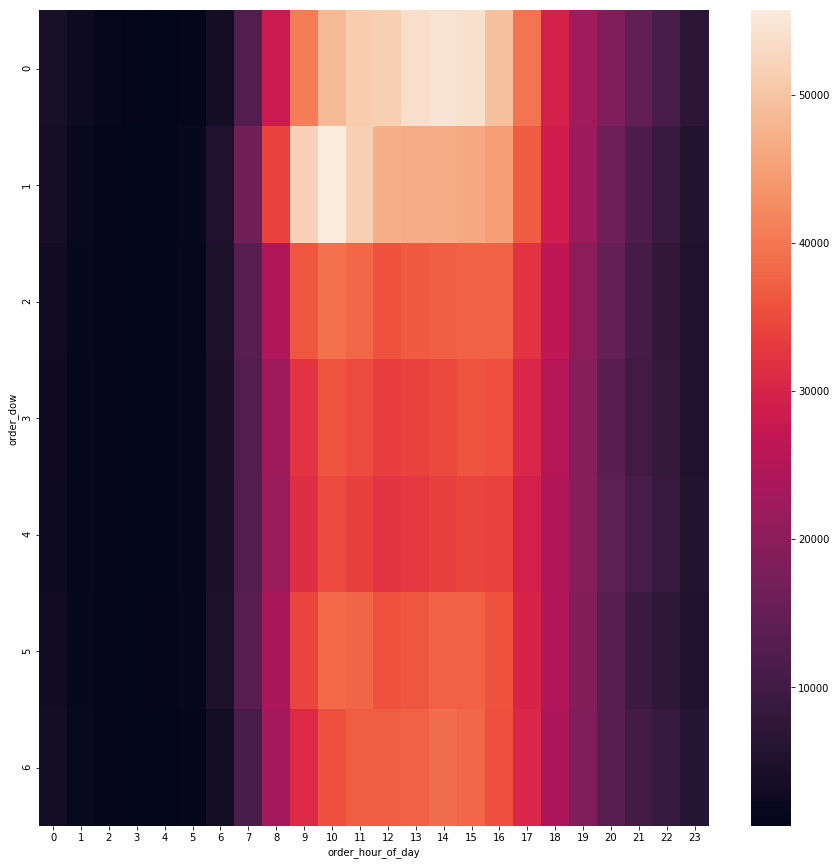

In [50]:
plt.figure(figsize=(15,15))
sns.heatmap(grouped_df)
plt.savefig('fig5')
plt.show()

Heat map between order hour of the day, day of the week and number of orders. It shows that maximum numbers of orders are during weekends and from 10 am to 4 am. It is also eviddent from previous cells. 

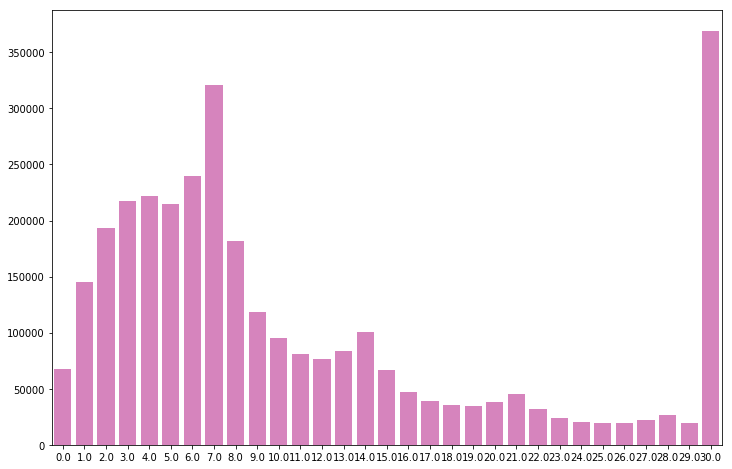

In [23]:
cnt_dsp=orders_df.days_since_prior_order.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cnt_dsp.index,cnt_dsp.values,color=color[6])
plt.savefig('fig6')
plt.show()

Bar plot indicates that people prefer to shop in th gap of 7 days and 30 days. There also smaller peaks at 14 days and 21 days(weekly intervals).

In [24]:
order_products_prior_df.reordered.sum()/order_products_prior_df.shape[0]

0.58969746679221613

In [25]:
grouped_df=order_products_prior_df.groupby('order_id')['reordered'].aggregate('sum')

In [26]:
grouped_df.head()

order_id
2     6
3     8
4    12
5    21
6     0
Name: reordered, dtype: int64

In [27]:
grouped_df=grouped_df.reset_index()

In [28]:
grouped_df['reordered'].ix[grouped_df['reordered']>=1]=1
grouped_df.reordered.value_counts()/grouped_df.shape[0]

/home/eee/ug/15085004/anaconda3/envs/ml/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


1    0.879151
0    0.120849
Name: reordered, dtype: float64

Percentage of items reordered are 87% and 12% of the items are ordered for the first time and never ordered again.

In [29]:
grouped_df=order_products_train_df.groupby('order_id')['reordered'].aggregate('sum').reset_index()

In [30]:
grouped_df['reordered'].ix[grouped_df['reordered']>=1]=1
grouped_df.reordered.value_counts()/grouped_df.shape[0]

/home/eee/ug/15085004/anaconda3/envs/ml/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


1    0.93444
0    0.06556
Name: reordered, dtype: float64

In [31]:
grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate(np.max).reset_index()

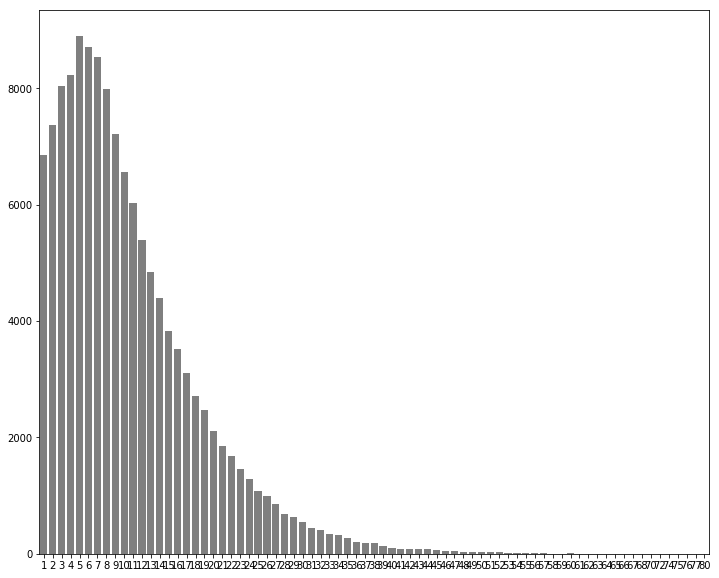

In [32]:
cnt_srs=grouped_df.add_to_cart_order.value_counts()
plt.figure(figsize=(12,10))
sns.barplot(cnt_srs.index,cnt_srs.values,color=color[7])
plt.savefig('fig7')
plt.show()

Bar plot show number of items in a particular order. It shows that there are around 6 to 12 items in an average in every order.

In [33]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [34]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [35]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [36]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [37]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs.head()

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584


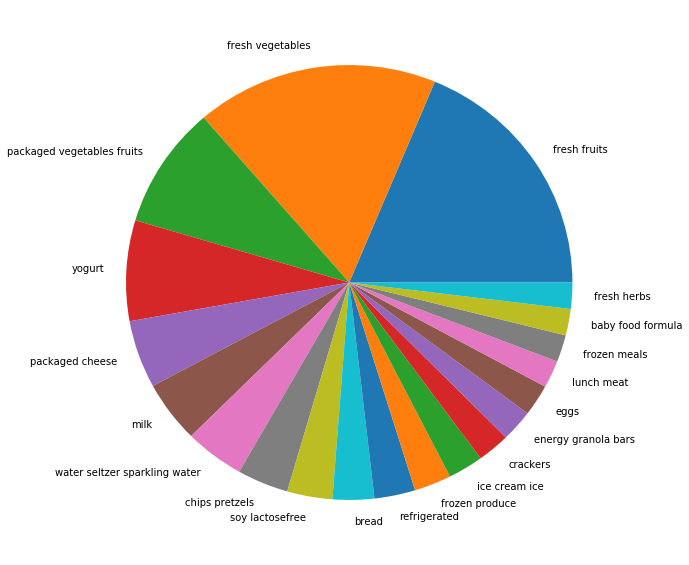

In [38]:
aisle_cnt=order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(10,10))
labels=(np.array(aisle_cnt.index))
sizes=(np.array(aisle_cnt/aisle_cnt.sum())*100)
plt.pie(sizes,labels=labels,startangle=0)
plt.savefig('fig8')
plt.show()

Aisle wise distribution of items in orders. Frest fruits and fresh vegetables are ordered the most as seen from pie chart.

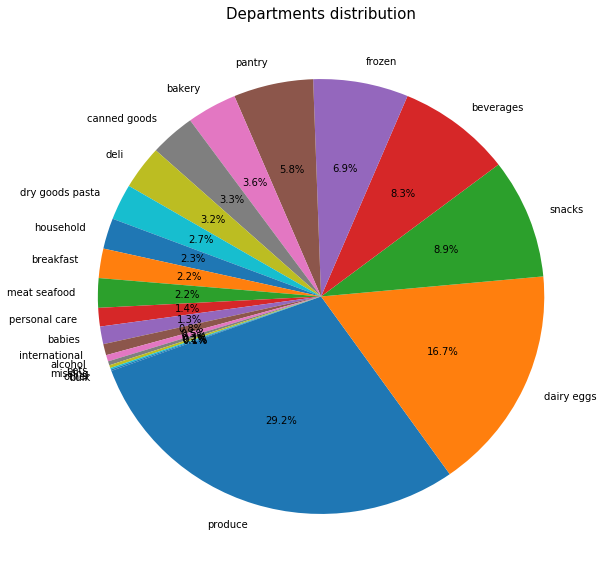

In [39]:
plt.figure(figsize=(10,10))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.savefig('fig9')
plt.show()

Department wise distributions of the orders. Prouce, dairy eggs and snacks are ordered the most. Rest are not ordered in significant percentage.

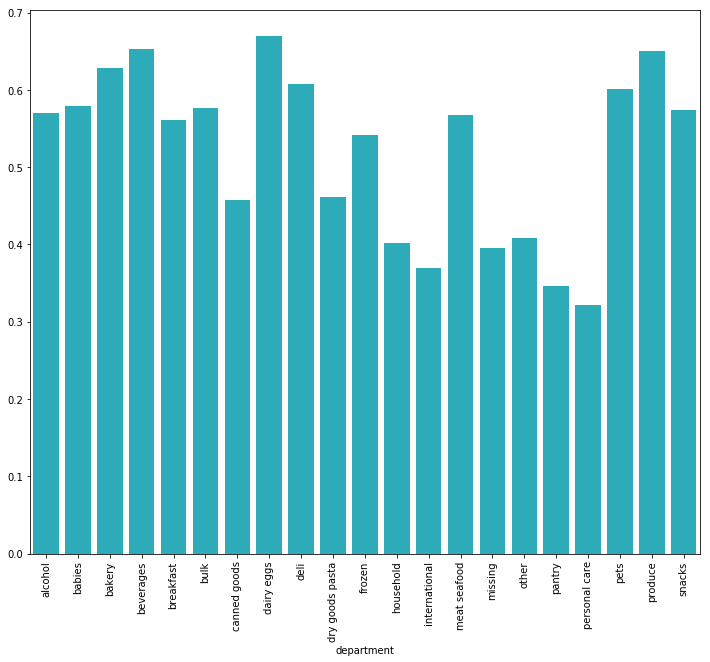

In [40]:
de_ro=order_products_prior_df.groupby('department')['reordered'].aggregate('mean')
plt.figure(figsize=(12,10))
sns.barplot(de_ro.index,de_ro.values,color=color[9])
plt.xticks(rotation='vertical')
plt.savefig('fig10')
plt.show()

Department wise reorders. Since we are interested in reordered items to predict the item that will be ordered in future. This bar plot shows produce and dairy eggs are reordered the most and have maximum possibility of being reordered.

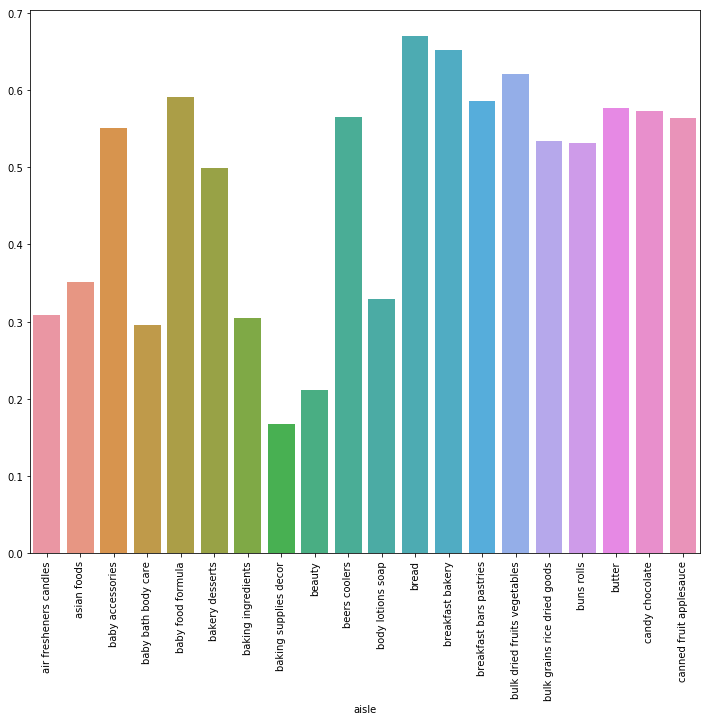

In [51]:


ai_ro=order_products_prior_df.groupby('aisle')['reordered'].aggregate('mean').head(20)
plt.figure(figsize=(12,10))
sns.barplot(ai_ro.index,ai_ro.values)
plt.xticks(rotation='vertical')
plt.savefig('fig11')
plt.show()

Aisle wise number of reorders. Finding corelation between number of reorders and other features is most significant in prediting future items in the cart. Bread and breakfast bakery has the highest chancesof being reordered.

/home/eee/ug/15085004/anaconda3/envs/ml/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/home/eee/ug/15085004/anaconda3/envs/ml/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


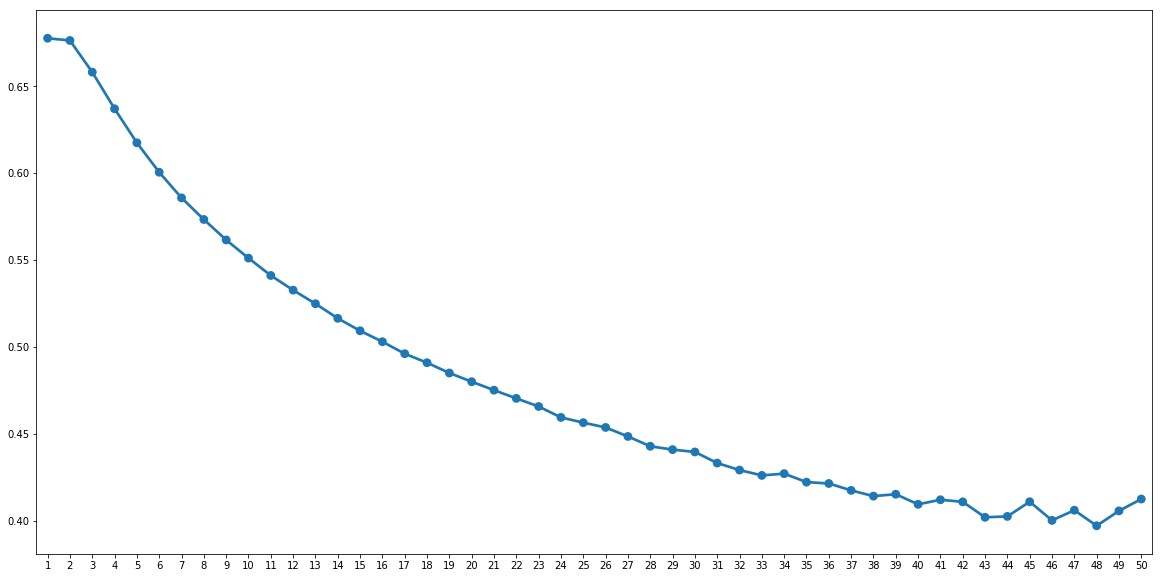

In [42]:
order_products_prior_df['add_to_cart_order_mod']=order_products_prior_df['add_to_cart_order'].copy()
order_products_prior_df['add_to_cart_order_mod'].ix[order_products_prior_df['add_to_cart_order_mod']>50]=50
add_ro=order_products_prior_df.groupby('add_to_cart_order_mod')['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(20,10))
sns.pointplot(add_ro['add_to_cart_order_mod'].values,add_ro['reordered'].values)
plt.savefig('fig12')
plt.show()

Above point graph shows the relationship between when the item was put to cart and its possibility of being reordered. It can be seen that items that are purchased earlier have highest chances of being reordered. It is logical in the sence that, customer tends to buy the particular item first that he regularly purchases. 

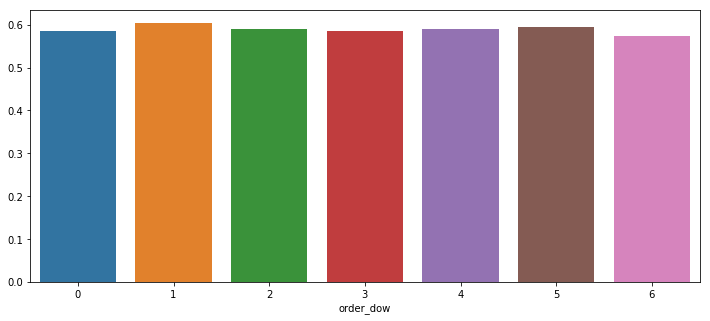

In [44]:
order_products_prior_df=pd.merge(order_products_prior_df,orders_df,on='order_id',how='left')
dow_reoder=order_products_prior_df.groupby('order_dow')['reordered'].aggregate('mean')
plt.figure(figsize=(12,5))
sns.barplot(dow_reoder.index,dow_reoder.values)
plt.savefig('fig13')
plt.show()
#order_products_prior_df.head()

Above bar plot shows the relationship between day of the week and probability of items that are reordered. There is no significant difference between days of the week. Probability is almost the same of item being reordered.

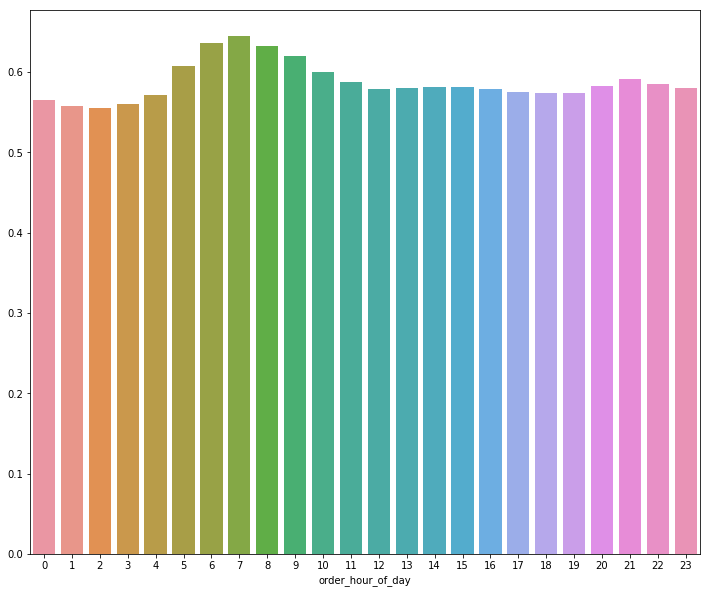

In [45]:
hod_reorder=order_products_prior_df.groupby('order_hour_of_day')['reordered'].aggregate('mean')
plt.figure(figsize=(12,10))
sns.barplot(hod_reorder.index,hod_reorder.values)
plt.savefig('fig14')
plt.show()

This bar plot shows the relation between hour of the day and he probability of item being reordered. It is seen that items bought earlier in the morning have the highest probability of being reordered.